In [20]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.interpolate import lagrange

In [3]:
from scipy import interp

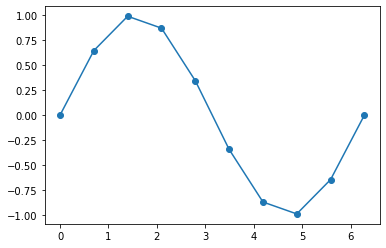

In [16]:
x = np.linspace(0,2*np.pi,10)
y=np.sin(x)
plt.plot(x,y,marker='o')

In [12]:
X=np.linspace(0,2*np.pi,40)
# plt.plot(x,y)
# plt.plot(X,y)

In [14]:
#线性插值
Y = interp(X,x,y)

C:\Users\陈文亮\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


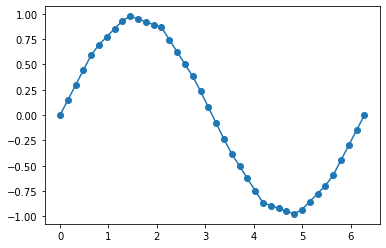

In [18]:
plt.plot(X,Y,marker='o') #在点和点直接,分层3端插值

In [21]:
#饭店的销量和周六周末影响大
#拉格朗日中值定理
sale = pd.read_excel('./sales.xlsx')
sale

,日期,销量
0,2015-03-01,51
1,2015-03-01,52
2,2015-03-01,53
3,2015-03-01,54
4,2015-03-01,55
5,2015-03-01,56
6,2015-03-01,57
7,2015-03-01,58
8,2015-03-01,59
9,2015-03-01,60


In [23]:
'''
拉格朗日中值法:
根据数学:平面上已知的n个点,可以找到一个n-1次多项式y = ax ax**2+++...,
使多项式曲线过这n个点
1.求已知的过n个点的多项式:
    y1=a0+a1x1+a2x1**2...
    y2=a0+a1x2+...
    yn
    解出拉格朗日插值多项式为:
    L(x) = yi

站在巨人的肩膀上,大概知道怎么回事,会用就行;

'''

'\n\n'

In [26]:
sale['销量'][(sale['销量'] < 60)|(sale['销量']>1000)] = np.NaN

In [27]:
sale

,日期,销量
0,2015-03-01,NaN
1,2015-03-01,NaN
2,2015-03-01,NaN
3,2015-03-01,NaN
4,2015-03-01,NaN
5,2015-03-01,NaN
6,2015-03-01,NaN
7,2015-03-01,NaN
8,2015-03-01,NaN
9,2015-03-01,60.0


In [45]:
#s数据 n这个位置,空数据
#k向前5个,向后5个
def fill_lagrange(s,n,k=5):
    y=s[list(range(n-k,n))+list(range(n+1,n+1+k))] #前面5个数,后面5个数
    y = y[y.notnull()] #需要剔除空值
    #w=s[list(range(n-k,n))+list(range(n+1,n+1+k))] #值
    
    return lagrange(y.index,list(y))
    

In [46]:
fill_lagrange(sale['销量'],8) #运行成功,插值成功

poly1d([4.44089210e-16, 0.00000000e+00, 4.54747351e-13, 1.00000000e+00,
       5.10000000e+01])

In [51]:
#i j 行列
#使用拉格朗日进行填充
#定义一个方法进行填充操作;
for i in sale.columns:
    for j in range(sale[i].size):
        if sale[i].isnull()[j]:
            print(j)
            #print(fill_lagrange(sale[i],j))#使用lagrange进行填充 定义的方法
            sale[i][j] = fill_lagrange(sale[i],j)

0


ValueError: setting an array element with a sequence.

In [40]:
for i in sale.columns:
    for j in range(sale[i].size):
        if sale[i].isnull()[j]:
            print(j)

0
1
2
3
4
5
6
7
8
22
23
24
25
26
27
28
29
30
44
45
46
47
48
49
50
51
52
53
54
55
66
67


In [49]:
sale

,日期,销量
0,2015-03-01,NaN
1,2015-03-01,NaN
2,2015-03-01,NaN
3,2015-03-01,NaN
4,2015-03-01,NaN
5,2015-03-01,NaN
6,2015-03-01,NaN
7,2015-03-01,NaN
8,2015-03-01,NaN
9,2015-03-01,60.0


In [ ]:
#×的值符合数字的规律